## Week 1: Assignment 

Jupyter Notebook: Jupyter Notebook (formerly IPython Notebooks) is a web-based interactive computational environment for creating notebook documents. Project Jupyter's operating philosophy is to support interactive data science and scientific computing across all programming languages via the development of open-source software. It supports different languages such as Python, R, and Julia. You can also install kernels to run other things like JavaScript.

A notebook kernel is a “computational engine” that executes the code contained in a Notebook document. The ipython kernel, referenced in this guide, executes python code. Kernels for many other languages exist.

https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html
https://github.com/jupyter/jupyter/wiki/Jupyter-kernels
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Notebook%20Basics.html
https://realpython.com/jupyter-notebook-introduction/

### Menu

**File** 
* Download as
* Close and Halt

**Edit**
* Moving Cells
* Find and Replace
    
**View** 
* Toggle Line Numbers
    
**Insert**
* Insert Cell Above (A)
* Insert Cell Below (B)

**Cell**
* Run Cell Ctrl-Enter
* Run Cell and Select Below Ctrl-Shift
* Run Cell and Insert Below Ctrl-Alt
    
**Kernel**
* Restart
    * Clear Output
    * Run All

**Widget**

**Help**

### Tool Bar

**Markdown vs Code**
* Markdown: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet
* Code: Code example in next cell
* Edit vs Command Modes (Green vs Blue Borders)
    * A B X ESC

### Data Science Model Example

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

In [2]:
# get the data
df = pd.read_csv('Advertising.csv', usecols=['TV', 'radio', 'newspaper', 'sales'])
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# shape of data
df.shape

(200, 4)

In [4]:
# look at info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# describe data
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


(array([26., 15., 21., 18., 19., 17., 22., 26., 20., 16.]),
 array([  0.7 ,  30.27,  59.84,  89.41, 118.98, 148.55, 178.12, 207.69,
        237.26, 266.83, 296.4 ]),
 <BarContainer object of 10 artists>)

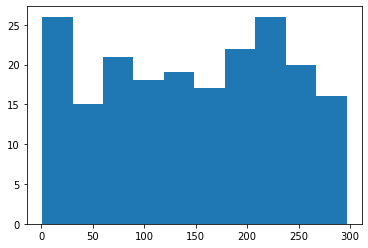

In [6]:
# plot TV histogram using matplotlib
plt.hist(df['TV'])

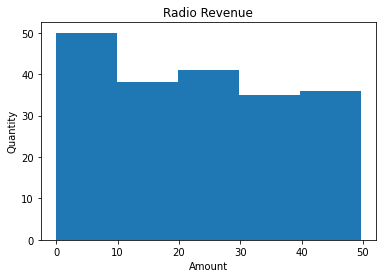

In [7]:
# plot radio histogram using matplotlib
plt.hist(df['radio'], bins=5)
plt.xlabel('Amount')
plt.ylabel('Quantity')
plt.title('Radio Revenue')
plt.show();

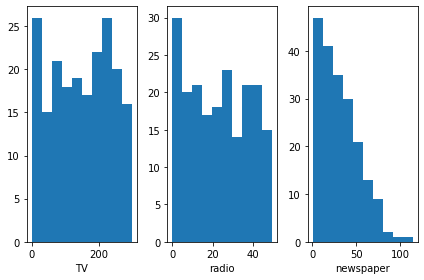

In [8]:
# using subplots using matplotlib https://matplotlib.org/stable/gallery/statistics/hist.html
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True)
axs[0].hist(df['TV'])
axs[0].set_xlabel('TV')

axs[1].hist(df['radio'])
axs[1].set_xlabel('radio')

axs[2].hist(df['newspaper'])
axs[2].set_xlabel('newspaper')

plt.show();

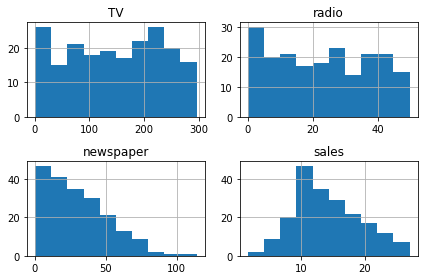

In [9]:
# using pandas and matplotlib
df.hist()
plt.tight_layout()

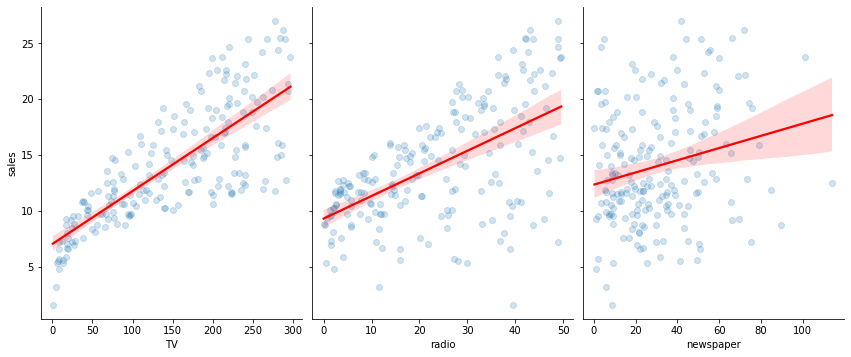

In [10]:
# scatterplot example with seaborn (sns)
sns.pairplot(df, x_vars=['TV','radio','newspaper'], y_vars='sales', 
             kind='reg', 
             size=5,
             aspect=0.8, 
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.2}})

In [11]:
# separate X, y
X = df.drop(['sales'], axis=1)
y = df.sales
print(X.head())
print()
print(y.head())

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64


In [12]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(y_train.shape)

(160, 3)
(160,)


In [13]:
# another split example
X_train, X_test, y_train, y_test = train_test_split(df.drop(['sales'], axis=1), 
                                                    df.sales, 
                                                    test_size=0.20, 
                                                    random_state=42)
print(X_train.shape)
print(y_train.shape)

(160, 3)
(160,)


In [14]:
# build, train (fit), predict, evaluate the model
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(f'MSE: {mean_squared_error(y_true=y_test, y_pred=predictions)}')
print(f'R-Squared: {r2_score(y_test, predictions)}')

MSE: 3.174097353976105
R-Squared: 0.899438024100912


In [15]:
# make a prediction
tv = 232.1
radio = 8.6
newspaper = 8.7
model.predict(np.array([tv, radio, newspaper]).reshape(1, -1))

array([15.0118875])

In [16]:
# what are our coefficients?
# what are our coefficients?
list(zip(X, model.coef_))

[('TV', 0.044729517468716326),
 ('radio', 0.18919505423437655),
 ('newspaper', 0.0027611143413671896)]

### More on Using the Tools

In [17]:
# python examples
# string
print('1' + '2')
# number
print(1 + 2)
# list (mutable)
l = [1, 2, 'hello', 3, 'there']
print(l)
l[4] = 'world'
# tuple (immutable)
t = (1, 2, 'hello', 3, 'there')
print(t)
# t[4] = 'world'
# set
print({1, 2, 3, 3, 4})
# dictionary
d = {'one': 1, 'two': 2, 'three': 3}
print(d)
print(d['one'])
# comprehensions
print([el for el in l])
for el in l:
    print(el)
    
print({k: v for k, v in d.items()})
for k, v in d.items():
    print(k, v)

12
3
[1, 2, 'hello', 3, 'there']
(1, 2, 'hello', 3, 'there')
{1, 2, 3, 4}
{'one': 1, 'two': 2, 'three': 3}
1
[1, 2, 'hello', 3, 'world']
1
2
hello
3
world
{'one': 1, 'two': 2, 'three': 3}
one 1
two 2
three 3


In [18]:
# numpy examples
# https://www.learndatasci.com/tutorials/applied-introduction-to-numpy-python-tutorial/
print(np.random.rand())
print(np.random.randint(10))
mat = np.random.randint(10, size=(5, 5))
print(mat)
print(mat[0:1])

0.39850156140080384
0
[[7 1 4 0 2]
 [3 1 4 9 3]
 [5 3 1 4 4]
 [0 0 7 3 0]
 [4 8 4 3 5]]
[[7 1 4 0 2]]


In [19]:
print(mat[0:3,3:4])
print(mat[0:3,3:])

[[0]
 [9]
 [4]]
[[0 2]
 [9 3]
 [4 4]]


In [20]:
# pandas examples
# https://pandas.pydata.org/docs/user_guide/10min.html

In [21]:
print(pd.DataFrame(mat))

   0  1  2  3  4
0  7  1  4  0  2
1  3  1  4  9  3
2  5  3  1  4  4
3  0  0  7  3  0
4  4  8  4  3  5


In [22]:
ex = pd.DataFrame(mat, columns=['one', 'two', 'three', 'four', 'five'])
print(ex)

   one  two  three  four  five
0    7    1      4     0     2
1    3    1      4     9     3
2    5    3      1     4     4
3    0    0      7     3     0
4    4    8      4     3     5


In [23]:
print(ex.loc[1])

one      3
two      1
three    4
four     9
five     3
Name: 1, dtype: int32


In [24]:
print(ex.iloc[0:2,3:5])

   four  five
0     0     2
1     9     3
